<a href="https://colab.research.google.com/github/Tasnim070824/f_group_importance/blob/main/antibac_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit

In [ ]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import seaborn as sns

In [ ]:
# Load your dataset
# Replace this with your actual data loading code
df = pd.read_csv('workable_output_de_novo.csv')
print("Initial dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
print("First few rows:")
print(df.head())

# Function to count functional groups in molecules
def count_functional_groups(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [0] * 10  # Return zeros if the SMILES is invalid

    # Define SMARTS patterns for the functional groups used in the paper
    patterns = {
    'beta_lactam': '[C]1[C](=O)N[C]1',  # Beta-lactam ring
    'amino': '[NX3;H2,H1,H0;!$(NC=O)]',  # Amino group
    'carboxylic_acid': '[CX3](=O)[OX2H]',  # Carboxylic acid
    'amide': 'C(=O)N',  # Amide linkage
    'aromatic': '[a]',  # Any aromatic atom
    'hydroxyl': '[OX2H]',  # Hydroxyl group
    'sulfonamide': '[SX4](=[OX1])(=[OX1])[NX3]',  # Sulfonamide
    #'thiol': '[SX2H]',  # Thiol/sulfhydryl group
    'heterocyclic_n': '[nX2,nX3]',  # Nitrogen in heterocyclic aromatic rings
    'heterocyclic_o': '[oX2]',  # Oxygen in heterocyclic aromatic rings
    'heterocyclic_s': '[sX2]',  # Sulfur in heterocyclic aromatic rings
    'guanidinium': '[NX3][CX3](=[NX2])[NX3]',  # Guanidinium group
    'phenol': '[OX2H][cX3]:[c]',  # Phenolic OH
    'fluorine': '[F]',  # Fluorine
    'chlorine': '[Cl]',  # Chlorine
    'ester': '[CX3](=O)[OX2][CX4]',  # Ester
    #'phosphate': '[PX4](=[OX1])([OX2])([OX2])[OX2]',  # Phosphate
    #'nitro': '[NX3](=[OX1])(=[OX1])',  # Nitro group
    #'azo': '[NX2]=[NX2]',  # Azo group
    'keto': '[CX3](=[OX1])[CX4]'  # Ketone
}

    counts = {}
    for name, pattern in patterns.items():
        patt = Chem.MolFromSmarts(pattern)
        matches = mol.GetSubstructMatches(patt)
        counts[name] = len(matches)

    return counts

# Extract functional group counts
func_groups = []
for s in df['SMILES']:
    func_groups.append(count_functional_groups(s))

# Convert to DataFrame
func_groups_df = pd.DataFrame(func_groups)
print("\nFunctional group counts for the first 5 molecules:")
print(func_groups_df.head())

# Count how many molecules have each functional group
print("\nNumber of molecules containing each functional group:")
for col in func_groups_df.columns:
    count = (func_groups_df[col] > 0).sum()
    print(f"{col}: {count} molecules")

Initial dataset shape: (600, 179)
Column names: ['Unnamed: 0', 'Molecule Name', 'SMILES', 'MD: Molecular_weight (g/mol)', 'MD: Total_charge (e)', 'MD: Atom_Count', 'MD: Heavy_atoms', 'MD: Asymmetric_atoms', 'MD: Total_DFT_energy (Hartree)', 'MD: HL_gap (Hartree)', 'MD: Total_dipole_moment (Db)', 'MD: Rotational_constant_a (GHz)', 'MD: Rotational_constant_b (GHz)', 'MD: Rotational_constant_c (GHz)', 'MD: Volume (A^3)', 'MD: Water_1st_hydration_shell', 'MD: ERR_WA1', 'MD: Water_2nd_hydration_shell', 'MD: ERR_WA2', 'MD: RMSF (A)', 'MD: ERR_RMSF (A)', 'MD: MPA (A^2)', 'MD: ERR_MPA (A^2)', 'MD: Asphericity', 'MD: ERR_ASP', 'MD: Acylindricity', 'MD: ERR_ACY', 'MD: Kappa2', 'MD: ERR_K2', 'MD: #poses_APA_20%', 'MD: Aff_APA_20% (kcal/mol)', 'MD: ERR_A20 (kcal/mol)', 'MD: #poses_APA_30%', 'MD: Aff_APA_30% (kcal/mol)', 'MD: ERR_A30 (kcal/mol)', 'MD: #poses_APA_40%', 'MD: Aff_APA_40% (kcal/mol)', 'MD: ERR_A40 (kcal/mol)', 'MD: Aff_APA (kcal/mol)', 'MD: ERR_APA (kcal/mol)', 'MD: SER79_A', 'MD: THR9


Feature matrix shape: (600, 16)
Target variable shape: (600,)
Target variable distribution:
ratio
1.000000    44
0.500000    13
0.720000     2
0.050000     2
0.250000     2
            ..
0.843373     1
0.747541     1
1.147679     1
0.678248     1
0.792208     1
Name: count, Length: 539, dtype: int64

Correlations between functional groups and target variable:
target             1.000000
fluorine           0.641139
keto               0.623874
amide              0.554639
amino              0.518502
hydroxyl           0.233082
phenol             0.001279
guanidinium       -0.007778
heterocyclic_o    -0.059588
sulfonamide       -0.066244
ester             -0.110795
aromatic          -0.171006
heterocyclic_s    -0.182640
beta_lactam       -0.192432
chlorine          -0.203763
carboxylic_acid   -0.231897
heterocyclic_n    -0.361147
Name: target, dtype: float64
Correlation plot saved.


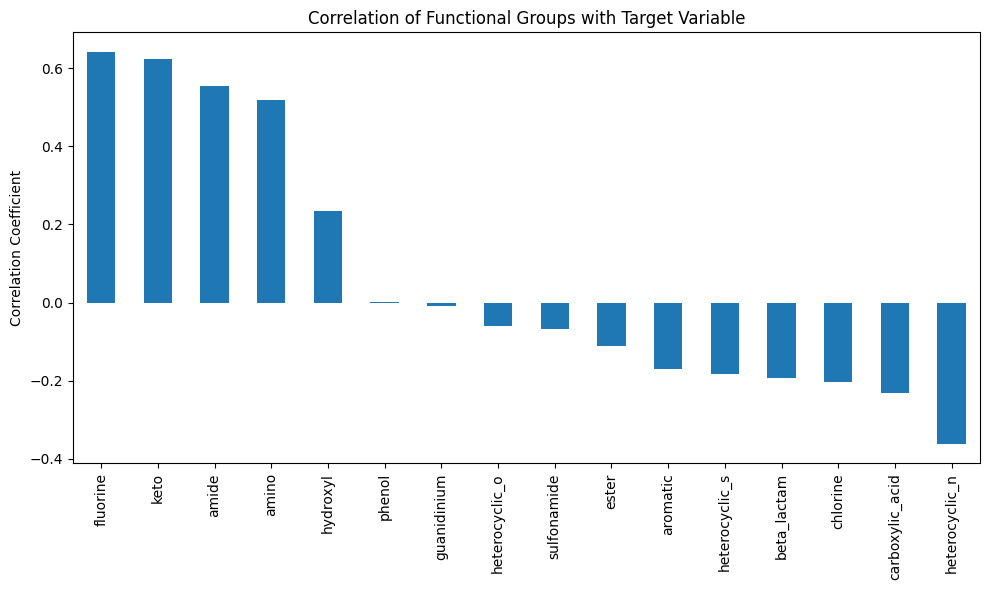

In [ ]:
# Combine functional group data with target variable
# Assuming your target variable is in a column called 'class'
X = func_groups_df
y = df['ratio']

print("\nFeature matrix shape:", X.shape)
print("Target variable shape:", y.shape)
print("Target variable distribution:")
print(y.value_counts())

# Check correlations between functional groups and target
X_with_target = X.copy()
X_with_target['target'] = y
correlation = X_with_target.corr()['target'].sort_values(ascending=False)
print("\nCorrelations between functional groups and target variable:")
print(correlation)

# Visualize correlations
plt.figure(figsize=(10, 6))
correlation.drop('target').plot(kind='bar')
plt.title('Correlation of Functional Groups with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('functional_group_correlations.png')
print("Correlation plot saved.")

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])



Training set size: 480
Test set size: 120


In [ ]:
# Build multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients
coefficients = pd.DataFrame({
    'Functional Group': X.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

print("\nModel coefficients:")
print(coefficients)

# Generate the equation in the same format as in the paper
intercept = model.intercept_
equation = f"log(Permeability) = {intercept:.3f}"
for group, coef in zip(X.columns, model.coef_):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.3f}(n × {group})"

print("\nGenerated equation:")
print(equation)


Model coefficients:
   Functional Group  Coefficient
15             keto     0.086474
5          hydroxyl     0.053753
12         fluorine     0.053571
11           phenol     0.052896
8    heterocyclic_o     0.049690
3             amide     0.033574
1             amino     0.030152
9    heterocyclic_s     0.027890
13         chlorine     0.027474
4          aromatic    -0.002469
7    heterocyclic_n    -0.032244
6       sulfonamide    -0.044802
2   carboxylic_acid    -0.135394
10      guanidinium    -0.161000
14            ester    -0.194184
0       beta_lactam    -0.200006

Generated equation:
log(Permeability) = 0.155 - 0.200(n × beta_lactam) + 0.030(n × amino) - 0.135(n × carboxylic_acid) + 0.034(n × amide) - 0.002(n × aromatic) + 0.054(n × hydroxyl) - 0.045(n × sulfonamide) - 0.032(n × heterocyclic_n) + 0.050(n × heterocyclic_o) + 0.028(n × heterocyclic_s) - 0.161(n × guanidinium) + 0.053(n × phenol) + 0.054(n × fluorine) + 0.027(n × chlorine) - 0.194(n × ester) + 0.086(n × keto)


In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
y_train_pred

array([ 0.73671548,  0.17925062, -0.09626358,  0.12280871,  0.57123111,
        0.53388189,  0.03241281,  0.69459583,  0.17448019,  0.16509287,
        0.13713096,  0.12858536,  0.95118224,  0.7902868 ,  0.28069311,
        0.95118224,  0.17925062,  0.21659984,  0.7904683 ,  0.27560041,
        0.17925062,  0.95001356,  0.89742942,  0.17448019,  0.13010106,
        0.72044823, -0.0157924 ,  0.30518719,  0.04512639,  0.12231791,
        0.22458638,  0.15246999,  0.21528859,  0.7904683 ,  0.19914201,
        0.69459583,  0.13713096,  0.14149213,  0.4138334 ,  0.14700632,
        0.17526115,  0.89761093,  0.17925062,  0.23803907,  1.05868788,
        0.73671548,  0.54811966,  0.69459583,  0.14700632, -0.06725473,
        1.05105197,  0.7904683 ,  0.29173853,  0.10184132,  1.05150632,
        0.21659984,  0.106193  ,  0.29041346,  0.18654855,  0.69459583,
        0.55973429,  0.69459583,  0.30612688,  0.16509287,  0.11134005,
        0.46704478,  0.06406919,  0.14169927,  0.1225392 ,  0.74

In [ ]:
y_test_pred

array([ 0.57454734,  0.13171571,  0.17431293,  0.20057764,  0.74834865,
        0.69459583,  0.16443757,  0.1261531 ,  0.14700632,  0.13032737,
        0.13391611,  0.4840911 ,  0.35562146,  0.42617537,  0.16682014,
        1.00475355,  0.13102662,  0.89761093,  0.61666699,  0.17925062,
        0.17925062,  0.20057764,  0.19914201,  0.25699792,  0.04045465,
        0.19914201,  0.21659984,  1.25757489,  0.30612688,  0.22002182,
        0.25699792,  0.48313523,  0.13482937,  0.69459583,  0.74152589,
        0.1261531 ,  0.69459583,  0.09443255,  0.11134005,  0.7904683 ,
        0.19738003,  0.13219328,  0.1454401 ,  0.17407647,  0.20195405,
        0.77581836,  0.11134005,  0.42864645,  0.17448019,  0.21801095,
        0.86839713,  0.86839713,  0.69459583,  0.30612688,  0.25699792,
        0.03555777,  0.84403961,  0.57600154,  0.73671548,  0.98133432,
        0.02583801,  0.95118224,  0.89779243,  0.15001306,  0.21623047,
        0.15571917,  0.17431293,  0.19749571,  0.18912598,  0.79


Model performance:
Training set: n = 480, R² = 0.5636, RMSE = 0.27
Test set: n = 120, R² = 0.4294, RMSE = 0.30
Prediction plot saved.


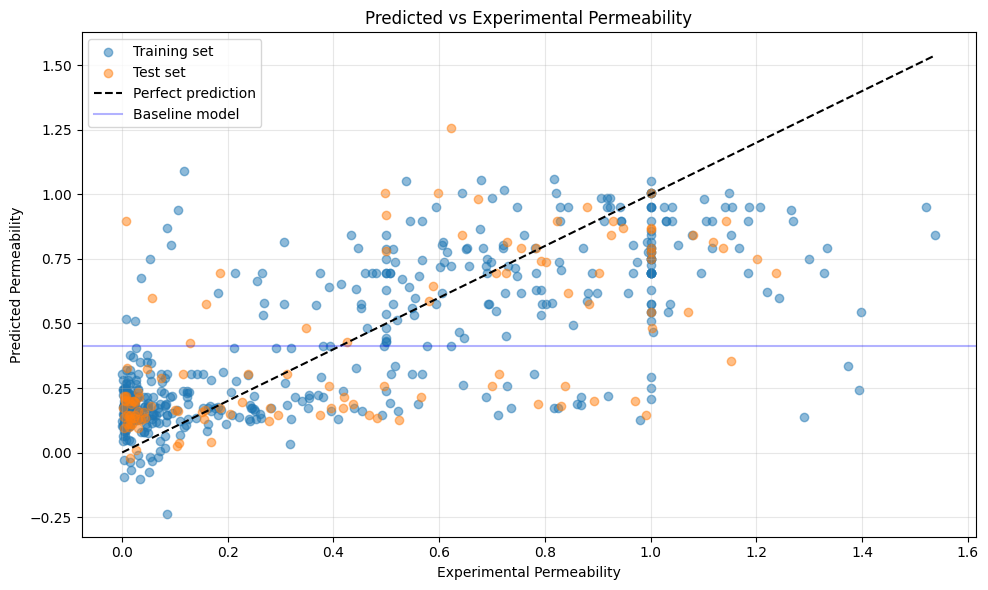

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel performance:")
print(f"Training set: n = {X_train.shape[0]}, R² = {train_r2:.4f}, RMSE = {train_rmse:.2f}")
print(f"Test set: n = {X_test.shape[0]}, R² = {test_r2:.4f}, RMSE = {test_rmse:.2f}")

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training set')
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test set')

# Add line of best fit
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect prediction')

# Add baseline model (mean of training data)
baseline = np.mean(y_train)
plt.axhline(y=baseline, color='b', linestyle='-', alpha=0.3, label='Baseline model')

plt.xlabel('Experimental Permeability')
plt.ylabel('Predicted Permeability')
plt.title('Predicted vs Experimental Permeability')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('predicted_vs_experimental.png')
print("Prediction plot saved.")

In [ ]:
X

,beta_lactam,amino,carboxylic_acid,amide,aromatic,hydroxyl,sulfonamide,heterocyclic_n,heterocyclic_o,heterocyclic_s,guanidinium,phenol,fluorine,chlorine,ester,keto
0,0,1,0,1,26,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,20,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,1,16,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,26,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,26,1,0,1,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,1,0,1,14,0,0,1,1,1,0,0,0,1,0,0
596,0,1,0,1,14,0,0,1,1,1,0,0,0,1,0,0
597,0,0,0,1,21,0,0,3,1,1,0,0,0,0,0,0
598,0,2,0,0,9,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
# Compute X transpose (X^T)
X_transpose = X.T

In [ ]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
beta_lactam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amino,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,2,1
carboxylic_acid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amide,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,1,1,1,0,1
aromatic,26,20,16,26,26,26,20,20,22,16,...,14,14,24,16,16,14,14,21,9,9
hydroxyl,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sulfonamide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
heterocyclic_n,1,1,0,1,1,1,1,1,0,0,...,1,1,2,1,1,1,1,3,1,1
heterocyclic_o,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,0
heterocyclic_s,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1


In [ ]:
# Compute (X^T * X)
XtX = X_transpose @ X

In [ ]:
XtX

,beta_lactam,amino,carboxylic_acid,amide,aromatic,hydroxyl,sulfonamide,heterocyclic_n,heterocyclic_o,heterocyclic_s,guanidinium,phenol,fluorine,chlorine,ester,keto
beta_lactam,31,14,36,78,230,45,1,48,3,9,0,7,0,3,5,67
amino,14,3086,51,2477,17611,578,67,881,21,72,32,43,2676,112,13,2108
carboxylic_acid,36,51,69,88,487,81,1,81,5,10,0,9,23,5,5,83
amide,78,2477,88,2781,15365,576,20,712,25,75,17,62,2553,105,25,2251
aromatic,230,17611,487,15365,149766,2953,389,9012,374,1007,96,627,12877,1559,92,10349
hydroxyl,45,578,81,576,2953,454,5,166,6,16,0,52,642,18,18,566
sulfonamide,1,67,1,20,389,5,30,23,1,7,0,0,20,4,0,20
heterocyclic_n,48,881,81,712,9012,166,23,1101,33,131,6,34,455,143,9,446
heterocyclic_o,3,21,5,25,374,6,1,33,28,13,0,0,11,13,1,9
heterocyclic_s,9,72,10,75,1007,16,7,131,13,84,0,1,12,36,4,36


In [ ]:
# Compute the inverse of (X^T * X)
XtX_inv = np.linalg.inv(XtX)

In [ ]:
XtX_inv

array([[ 1.19343886e-01,  4.81637174e-03, -5.10917346e-02,
        -7.24627747e-03,  3.08990158e-04, -6.78264977e-04,
        -9.95219940e-03, -2.78524673e-03, -9.62950964e-04,
        -2.27017086e-03, -3.82895563e-03, -2.81727815e-03,
         2.79229486e-03,  2.12629423e-03, -1.26046326e-02,
        -2.38498132e-03],
       [ 4.81637174e-03,  2.99995339e-03, -9.60857215e-04,
        -2.69230084e-05, -2.23092837e-04, -5.87563880e-04,
        -2.86595112e-03,  8.28485253e-06,  8.51445654e-04,
         3.79762915e-04, -3.21675826e-03,  1.00138637e-03,
        -3.81000179e-04,  3.79534219e-04, -1.40637708e-04,
        -1.31064677e-03],
       [-5.10917346e-02, -9.60857215e-04,  4.43553024e-02,
         2.41439656e-03, -8.64005113e-05, -4.08917223e-03,
         2.91787521e-03, -7.61495217e-04, -2.03301468e-03,
         1.55354089e-03,  3.94349576e-04,  1.82253235e-03,
        -2.12540829e-04,  3.11031315e-04,  4.93890059e-03,
         5.12323876e-05],
       [-7.24627747e-03, -2.69230084e

In [ ]:
# Calculate standard error of estimate
def calculate_standard_error(X, y, y_pred, coef):
    n = len(y)
    p = len(coef)  # Number of parameters

    # Calculate residual standard error
    residuals = y - y_pred
    residual_sum_squares = np.sum(residuals**2)
    sigma = np.sqrt(residual_sum_squares / (n - p - 1))

    # Calculate X'X inverse for standard errors
    XTX_inv = np.linalg.inv(X.T.dot(X))

    # Calculate standard errors for each coefficient
    se = np.sqrt(np.diag(XTX_inv) * sigma**2)

    return se

# Calculate t-statistics and p-values
from scipy import stats

se_train = calculate_standard_error(X_train, y_train, y_train_pred, model.coef_)
t_stats = model.coef_ / se_train
p_values = [2 * (1 - stats.t.cdf(abs(t), len(X_train) - len(model.coef_) - 1)) for t in t_stats]

significance = pd.DataFrame({
    'Functional Group': X.columns,
    'Coefficient': model.coef_,
    'Standard Error': se_train,
    't-statistic': t_stats,
    'p-value': p_values
})

print("\nStatistical significance of coefficients:")
print(significance.sort_values('p-value'))

# Identify significant terms (p < 0.05)
significant_terms = significance[significance['p-value'] < 0.05]
print(f"\nNumber of statistically significant terms: {len(significant_terms)}")


Statistical significance of coefficients:
   Functional Group  Coefficient  Standard Error  t-statistic       p-value
12         fluorine     0.053571        0.010074     5.317554  1.639774e-07
15             keto     0.086474        0.021073     4.103545  4.808139e-05
5          hydroxyl     0.053753        0.019640     2.736864  6.441439e-03
14            ester    -0.194184        0.082532    -2.352841  1.904811e-02
2   carboxylic_acid    -0.135394        0.063220    -2.141640  3.274369e-02
10      guanidinium    -0.161000        0.076087    -2.115997  3.487819e-02
7    heterocyclic_n    -0.032244        0.015427    -2.090098  3.715397e-02
1             amino     0.030152        0.016978     1.775908  7.640471e-02
0       beta_lactam    -0.200006        0.114191    -1.751509  8.052034e-02
3             amide     0.033574        0.019984     1.680074  9.361743e-02
11           phenol     0.052896        0.034952     1.513394  1.308618e-01
4          aromatic    -0.002469        0.002

In [ ]:
# Create a refined model with only significant terms
if len(significant_terms) > 0:
    significant_features = significant_terms['Functional Group'].tolist()

    X_train_significant = X_train[significant_features]
    X_test_significant = X_test[significant_features]

    refined_model = LinearRegression()
    refined_model.fit(X_train_significant, y_train)

    # Make predictions with refined model
    y_train_pred_refined = refined_model.predict(X_train_significant)
    y_test_pred_refined = refined_model.predict(X_test_significant)

    # Calculate metrics for refined model
    train_r2_refined = r2_score(y_train, y_train_pred_refined)
    test_r2_refined = r2_score(y_test, y_test_pred_refined)
    train_rmse_refined = np.sqrt(mean_squared_error(y_train, y_train_pred_refined))
    test_rmse_refined = np.sqrt(mean_squared_error(y_test, y_test_pred_refined))

    print("\nRefined model performance:")
    print(f"Training set: n = {X_train.shape[0]}, R² = {train_r2_refined:.4f}, RMSE = {train_rmse_refined:.2f}")
    print(f"Test set: n = {X_test.shape[0]}, R² = {test_r2_refined:.4f}, RMSE = {test_rmse_refined:.2f}")

    # Generate refined equation
    refined_intercept = refined_model.intercept_
    refined_equation = f"log(Permeability) = {refined_intercept:.3f}"
    for group, coef in zip(significant_features, refined_model.coef_):
        sign = "+" if coef >= 0 else "-"
        refined_equation += f" {sign} {abs(coef):.3f}(n × {group})"

    print("\nRefined equation:")
    print(refined_equation)
else:
    print("\nNo significant terms found. Refined model not created.")


Refined model performance:
Training set: n = 480, R² = 0.5531, RMSE = 0.27
Test set: n = 120, R² = 0.4195, RMSE = 0.30

Refined equation:
log(Permeability) = 0.212 - 0.244(n × carboxylic_acid) + 0.061(n × hydroxyl) - 0.038(n × heterocyclic_n) - 0.127(n × guanidinium) + 0.063(n × fluorine) - 0.236(n × ester) + 0.106(n × keto)


In [ ]:
 #Test the model with a specific compound
def test_with_compound(smiles, model, feature_names):
    # Get functional group counts
    counts = count_functional_groups(smiles)

    # Create feature vector
    features = [counts[name] for name in feature_names]

    # Make prediction
    prediction = model.predict([features])[0]

    return prediction, counts

# You can replace this with a real test compound
test_smiles = "O=C(NC1=CC=C(C2=NCCN2)C=C1)C1=CC=C2C(=C1)C=CC=C2C1=CC=CC=C1C#N"  # Aspirin as an example
test_prediction, test_counts = test_with_compound(test_smiles, model, X.columns)

print("\nTest compound prediction:")
print(f"SMILES: {test_smiles}")
print("Functional group counts:")
for group, count in test_counts.items():
    print(f"  {group}: {count}")
print(f"Predicted permeability: {test_prediction:.4f}")

# Create a table similar to Fig. 2 in the paper
contribution_table = pd.DataFrame({
    'Functional Group': X.columns,
    'Contribution / group': model.coef_,
    'No. of groups': [test_counts[col] for col in X.columns],
    'Total contribution': [model.coef_[i] * test_counts[X.columns[i]] for i in range(len(X.columns))]
})
contribution_table['Total contribution'] = contribution_table['Contribution / group'] * contribution_table['No. of groups']

print("\nContribution table for test compound:")
print(contribution_table)
print(f"Intercept: {model.intercept_:.4f}")
print(f"Sum of contributions: {np.sum(contribution_table['Total contribution']):.4f}")
print(f"Final prediction: {model.intercept_ + np.sum(contribution_table['Total contribution']):.4f}")


Test compound prediction:
SMILES: O=C(NC1=CC=C(C2=NCCN2)C=C1)C1=CC=C2C(=C1)C=CC=C2C1=CC=CC=C1C#N
Functional group counts:
  beta_lactam: 0
  amino: 1
  carboxylic_acid: 0
  amide: 1
  aromatic: 22
  hydroxyl: 0
  sulfonamide: 0
  heterocyclic_n: 0
  heterocyclic_o: 0
  heterocyclic_s: 0
  guanidinium: 0
  phenol: 0
  fluorine: 0
  chlorine: 0
  ester: 0
  keto: 0
Predicted permeability: 0.1644

Contribution table for test compound:
   Functional Group  Contribution / group  No. of groups  Total contribution
0       beta_lactam             -0.200006              0           -0.000000
1             amino              0.030152              1            0.030152
2   carboxylic_acid             -0.135394              0           -0.000000
3             amide              0.033574              1            0.033574
4          aromatic             -0.002469             22           -0.054315
5          hydroxyl              0.053753              0            0.000000
6       sulfonamide     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Check if your dataset has experimental condition variables
# If not, you might want to create subsets based on other relevant features

# Example: Creating subsets based on molecular weight ranges
# (You would replace this with your own grouping logic)

from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_mol_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.nan
    return Descriptors.MolWt(mol)

molecular_weights = [calculate_mol_weight(s) for s in df['SMILES']]
df['MW'] = molecular_weights

# Create subsets based on molecular weight
low_mw = df[df['MW'] < 250]
mid_mw = df[(df['MW'] >= 250) & (df['MW'] < 500)]
high_mw = df[df['MW'] >= 500]

print("\nSubsets based on molecular weight:")
print(f"Low MW (<250): {len(low_mw)} compounds")
print(f"Mid MW (250-500): {len(mid_mw)} compounds")
print(f"High MW (>500): {len(high_mw)} compounds")

# Function to create and evaluate a model for a subset
def build_model_for_subset(subset_df, subset_name):
    if len(subset_df) < 20:  # Skip if too few samples
        print(f"\nSkipping {subset_name} subset (too few samples)")
        return None

    # Extract SMILES
    subset_smiles = subset_df['SMILES']

    # Count functional groups
    subset_func_groups = []
    for s in subset_smiles:
        subset_func_groups.append(count_functional_groups(s))

    subset_X = pd.DataFrame(subset_func_groups)
    subset_y = subset_df['class']

    # Split data
    subset_X_train, subset_X_test, subset_y_train, subset_y_test = train_test_split(
        subset_X, subset_y, test_size=0.2, random_state=42
    )

    # Build model
    subset_model = LinearRegression()
    subset_model.fit(subset_X_train, subset_y_train)

    # Evaluate
    subset_y_train_pred = subset_model.predict(subset_X_train)
    subset_y_test_pred = subset_model.predict(subset_X_test)

    subset_train_r2 = r2_score(subset_y_train, subset_y_train_pred)
    subset_test_r2 = r2_score(subset_y_test, subset_y_test_pred)
    subset_train_rmse = np.sqrt(mean_squared_error(subset_y_train, subset_y_train_pred))
    subset_test_rmse = np.sqrt(mean_squared_error(subset_y_test, subset_y_test_pred))

    print(f"\n{subset_name} subset model performance:")
    print(f"Training set: n = {subset_X_train.shape[0]}, R² = {subset_train_r2:.4f}, RMSE = {subset_train_rmse:.2f}")
    print(f"Test set: n = {subset_X_test.shape[0]}, R² = {subset_test_r2:.4f}, RMSE = {subset_test_rmse:.2f}")

    # Generate equation
    subset_intercept = subset_model.intercept_
    subset_equation = f"log(Permeability) = {subset_intercept:.3f}"
    for group, coef in zip(subset_X.columns, subset_model.coef_):
        sign = "+" if coef >= 0 else "-"
        subset_equation += f" {sign} {abs(coef):.3f}(n × {group})"

    print(f"\n{subset_name} subset equation:")
    print(subset_equation)

    return subset_model

# Build models for each subset
low_mw_model = build_model_for_subset(low_mw, "Low MW")
mid_mw_model = build_model_for_subset(mid_mw, "Mid MW")
high_mw_model = build_model_for_subset(high_mw, "High MW")


Subsets based on molecular weight:
Low MW (<250): 4 compounds
Mid MW (250-500): 324 compounds
High MW (>500): 272 compounds

Skipping Low MW subset (too few samples)

Mid MW subset model performance:
Training set: n = 259, R² = 0.2955, RMSE = 0.31
Test set: n = 65, R² = -0.0182, RMSE = 0.35

Mid MW subset equation:
log(Permeability) = 0.258 - 0.433(n × beta_lactam) + 0.063(n × amino) - 0.212(n × carboxylic_acid) + 0.036(n × amide) - 0.014(n × aromatic) + 0.040(n × hydroxyl) - 0.001(n × sulfonamide) - 0.050(n × heterocyclic_n) + 0.108(n × heterocyclic_o) + 0.051(n × heterocyclic_s) + 0.000(n × guanidinium) + 0.050(n × phenol) + 0.038(n × fluorine) + 0.025(n × chlorine) - 0.179(n × ester) + 0.172(n × keto)

High MW subset model performance:
Training set: n = 217, R² = 0.5095, RMSE = 0.32
Test set: n = 55, R² = 0.0221, RMSE = 0.46

High MW subset equation:
log(Permeability) = 0.674 - 0.335(n × beta_lactam) + 0.021(n × amino) - 0.097(n × carboxylic_acid) - 0.091(n × amide) - 0.012(n × aro

In [ ]:
# Compare all models
models_comparison = [
    {"name": "Full dataset model", "train_r2": train_r2, "test_r2": test_r2, "train_rmse": train_rmse, "test_rmse": test_rmse}
]

# Add refined model if it exists
if 'train_r2_refined' in locals():
    models_comparison.append({
        "name": "Refined model (significant terms only)",
        "train_r2": train_r2_refined,
        "test_r2": test_r2_refined,
        "train_rmse": train_rmse_refined,
        "test_rmse": test_rmse_refined
    })

# Add subset models if they exist
if low_mw_model is not None:
    subset_X = pd.DataFrame([count_functional_groups(s) for s in low_mw['SMILES']])
    subset_y = low_mw['class']
    subset_X_train, subset_X_test, subset_y_train, subset_y_test = train_test_split(
        subset_X, subset_y, test_size=0.2, random_state=42
    )
    subset_y_train_pred = low_mw_model.predict(subset_X_train)
    subset_y_test_pred = low_mw_model.predict(subset_X_test)
    models_comparison.append({
        "name": "Low MW subset model",
        "train_r2": r2_score(subset_y_train, subset_y_train_pred),
        "test_r2": r2_score(subset_y_test, subset_y_test_pred),
        "train_rmse": np.sqrt(mean_squared_error(subset_y_train, subset_y_train_pred)),
        "test_rmse": np.sqrt(mean_squared_error(subset_y_test, subset_y_test_pred))
    })

# Display comparison
comparison_df = pd.DataFrame(models_comparison)
print("\nComparison of all models:")
print(comparison_df)

# Select the best model based on test R² value
best_model = comparison_df.loc[comparison_df['test_r2'].idxmax()]
print("\nBest model based on test R²:")
print(best_model)


Comparison of all models:
                                     name  train_r2   test_r2  train_rmse  \
0                      Full dataset model  0.563571  0.429352    0.269483   
1  Refined model (significant terms only)  0.553117  0.419468    0.272691   

   test_rmse  
0   0.297949  
1   0.300518  

Best model based on test R²:
name          Full dataset model
train_r2                0.563571
test_r2                 0.429352
train_rmse              0.269483
test_rmse               0.297949
Name: 0, dtype: object


Top 5 most influential functional groups:
   Functional_Group  Coefficient  Absolute_Coefficient
0       beta_lactam    -0.200006              0.200006
14            ester    -0.194184              0.194184
10      guanidinium    -0.161000              0.161000
2   carboxylic_acid    -0.135394              0.135394
15             keto     0.086474              0.086474


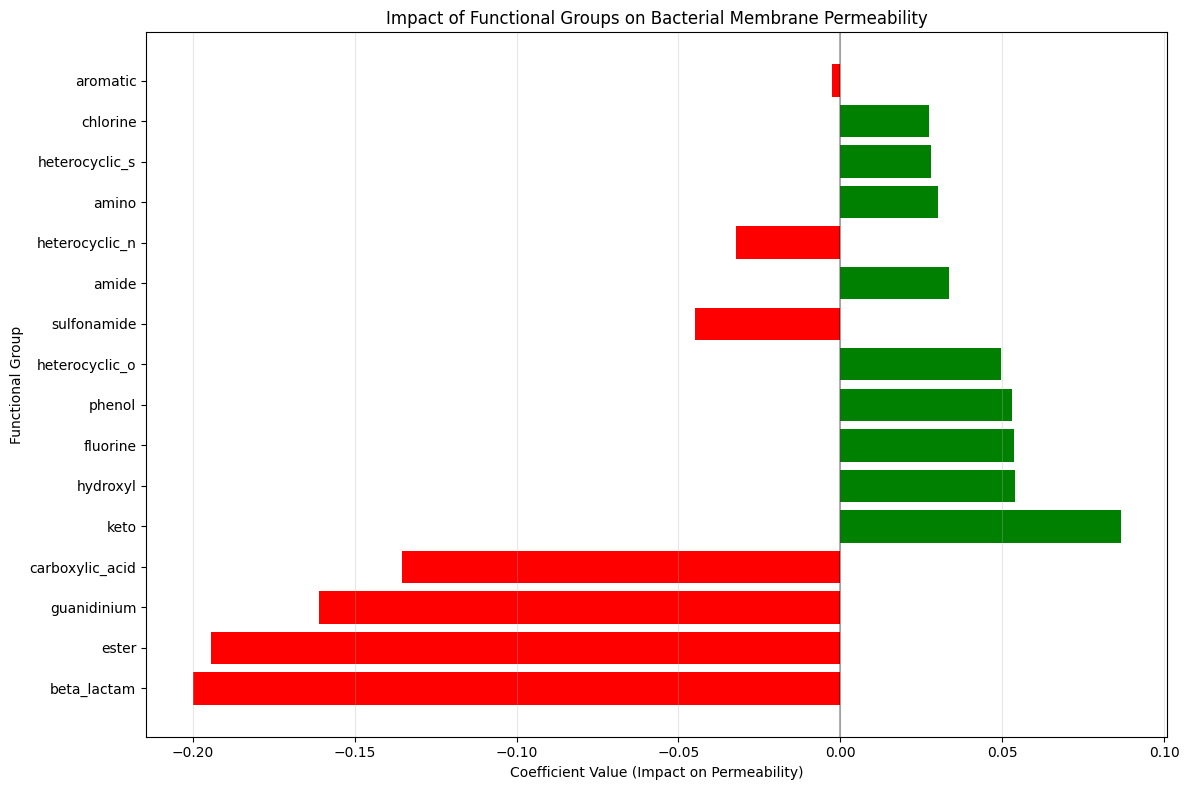

In [ ]:
# Define SMARTS patterns for the functional groups used in the paper
patterns = {
    'beta_lactam': '[C]1[C](=O)N[C]1',  # Beta-lactam ring
    'amino': '[NX3;H2,H1,H0;!$(NC=O)]',  # Amino group
    'carboxylic_acid': '[CX3](=O)[OX2H]',  # Carboxylic acid
    'amide': 'C(=O)N',  # Amide linkage
    'aromatic': '[a]',  # Any aromatic atom
    'hydroxyl': '[OX2H]',  # Hydroxyl group
    'sulfonamide': '[SX4](=[OX1])(=[OX1])[NX3]',  # Sulfonamide
    #'thiol': '[SX2H]',  # Thiol/sulfhydryl group
    'heterocyclic_n': '[nX2,nX3]',  # Nitrogen in heterocyclic aromatic rings
    'heterocyclic_o': '[oX2]',  # Oxygen in heterocyclic aromatic rings
    'heterocyclic_s': '[sX2]',  # Sulfur in heterocyclic aromatic rings
    'guanidinium': '[NX3][CX3](=[NX2])[NX3]',  # Guanidinium group
    'phenol': '[OX2H][cX3]:[c]',  # Phenolic OH
    'fluorine': '[F]',  # Fluorine
    'chlorine': '[Cl]',  # Chlorine
    'ester': '[CX3](=O)[OX2][CX4]',  # Ester
    #'phosphate': '[PX4](=[OX1])([OX2])([OX2])[OX2]',  # Phosphate
    #'nitro': '[NX3](=[OX1])(=[OX1])',  # Nitro group
    #'azo': '[NX2]=[NX2]',  # Azo group
    'keto': '[CX3](=[OX1])[CX4]'  # Ketone
}
# Get feature importance from linear model
coef_df = pd.DataFrame({
    'Functional_Group': patterns.keys(),
    'Coefficient': model.coef_,
    'Absolute_Coefficient': np.abs(model.coef_)
})

# Sort by absolute coefficient value
coef_df = coef_df.sort_values('Absolute_Coefficient', ascending=False)

# Visualize importance
plt.figure(figsize=(12, 8))
plt.barh(y=coef_df['Functional_Group'], width=coef_df['Coefficient'], color=['red' if x < 0 else 'green' for x in coef_df['Coefficient']])
plt.xlabel('Coefficient Value (Impact on Permeability)')
plt.ylabel('Functional Group')
plt.title('Impact of Functional Groups on Bacterial Membrane Permeability')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('functional_group_importance_linear.png')
print("Top 5 most influential functional groups:")
print(coef_df.head(5))

*Exploring Non-linear Models*

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Set up non-linear models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    }

    print(f"\n{name} model performance:")
    print(f"Training set: R² = {train_r2:.4f}, RMSE = {train_rmse:.4f}")
    print(f"Test set: R² = {test_r2:.4f}, RMSE = {test_rmse:.4f}")

# Add linear model results for comparison
results['Linear Regression'] = {
    'train_r2': train_r2,
    'test_r2': test_r2,
    'train_rmse': train_rmse,
    'test_rmse': test_rmse
}

# Compare models
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[model]['train_r2'] for model in results],
    'Test R²': [results[model]['test_r2'] for model in results],
    'Train RMSE': [results[model]['train_rmse'] for model in results],
    'Test RMSE': [results[model]['test_rmse'] for model in results]
})

print("\nModel comparison:")
print(comparison_df.sort_values('Test R²', ascending=False))


Random Forest model performance:
Training set: R² = 0.7966, RMSE = 0.1840
Test set: R² = 0.3290, RMSE = 0.3231

Gradient Boosting model performance:
Training set: R² = 0.7145, RMSE = 0.2180
Test set: R² = 0.4569, RMSE = 0.2907

Model comparison:
               Model  Train R²   Test R²  Train RMSE  Test RMSE
1  Gradient Boosting  0.714475  0.456860    0.217970   0.290679
2  Linear Regression  0.714475  0.456860    0.217970   0.290679
0      Random Forest  0.796557  0.329032    0.183991   0.323079


**Hyperparameter Tuning for Best Model**

In [ ]:
# Identify best model type from previous results
best_model_name = comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Model']
print(f"\nPerforming hyperparameter tuning for {best_model_name}")

# Define parameter grid based on best model type
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestRegressor(random_state=42)

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    base_model = GradientBoostingRegressor(random_state=42)
else:
    print("Best model is Linear Regression, no hyperparameter tuning needed")
    base_model = None

# Run grid search if applicable
if base_model is not None:
    # Use a smaller grid for demonstration (adjust based on your computational resources)
    print("Starting grid search (this may take some time)...")

    grid_search = GridSearchCV(
        base_model,
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")

    # Evaluate best model
    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    best_train_r2 = r2_score(y_train, y_train_pred)
    best_test_r2 = r2_score(y_test, y_test_pred)
    best_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    best_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"\nTuned {best_model_name} performance:")
    print(f"Training set: R² = {best_train_r2:.4f}, RMSE = {best_train_rmse:.4f}")
    print(f"Test set: R² = {best_test_r2:.4f}, RMSE = {best_test_rmse:.4f}")


Performing hyperparameter tuning for Gradient Boosting
Starting grid search (this may take some time)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation R²: 0.5757

Tuned Gradient Boosting performance:
Training set: R² = 0.6795, RMSE = 0.2310
Test set: R² = 0.4817, RMSE = 0.2840



Top 5 most important functional groups from non-linear model:
   Functional_Group  Importance
12         fluorine    0.628962
15             keto    0.145819
1             amino    0.083201
4          aromatic    0.039407
7    heterocyclic_n    0.030891


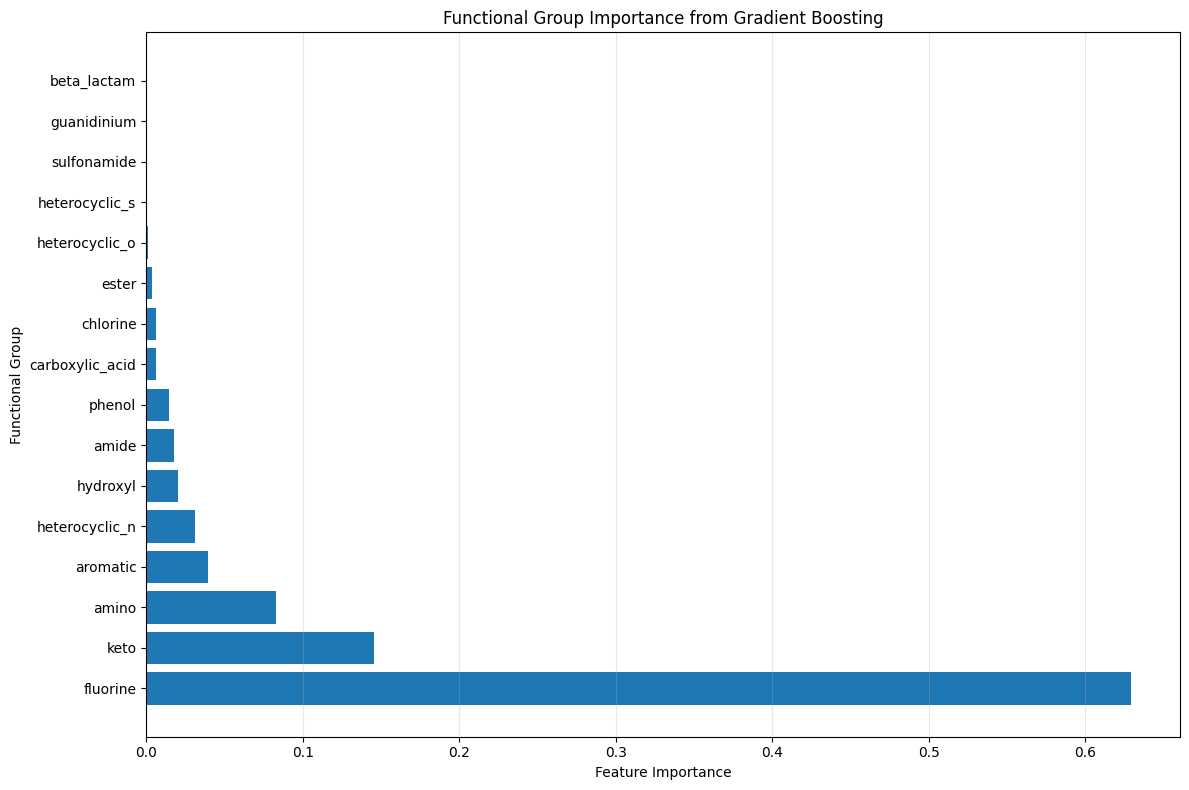

In [ ]:
# Get feature importance from the best non-linear model
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    if 'best_model' in locals():
        model_for_importance = best_model  # Use tuned model if available
    else:
        model_for_importance = results[best_model_name]['model']  # Use untuned model

    # Get feature importance
    feature_importance = model_for_importance.feature_importances_

    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Functional_Group': X.columns,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    # Visualize importance
    plt.figure(figsize=(12, 8))
    plt.barh(y=importance_df['Functional_Group'], width=importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Functional Group')
    plt.title(f'Functional Group Importance from {best_model_name}')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('functional_group_importance_nonlinear.png')

    print("\nTop 5 most important functional groups from non-linear model:")
    print(importance_df.head(5))

**comparative feature importance between linear and nonlinear model**


Functional groups with largest difference in importance between models:
  Functional_Group  Linear_Importance  Nonlinear_Importance  Linear_Rank  \
3      beta_lactam           0.200006              0.000000          1.0   
2         aromatic           0.002469              0.039407         16.0   
8      guanidinium           0.161000              0.000026          3.0   
1            amino           0.030152              0.083201         13.0   
6            ester           0.194184              0.003975          2.0   

   Nonlinear_Rank  Rank_Difference  
3            16.0             15.0  
2             4.0             12.0  
8            15.0             12.0  
1             3.0             10.0  
6            11.0              9.0  


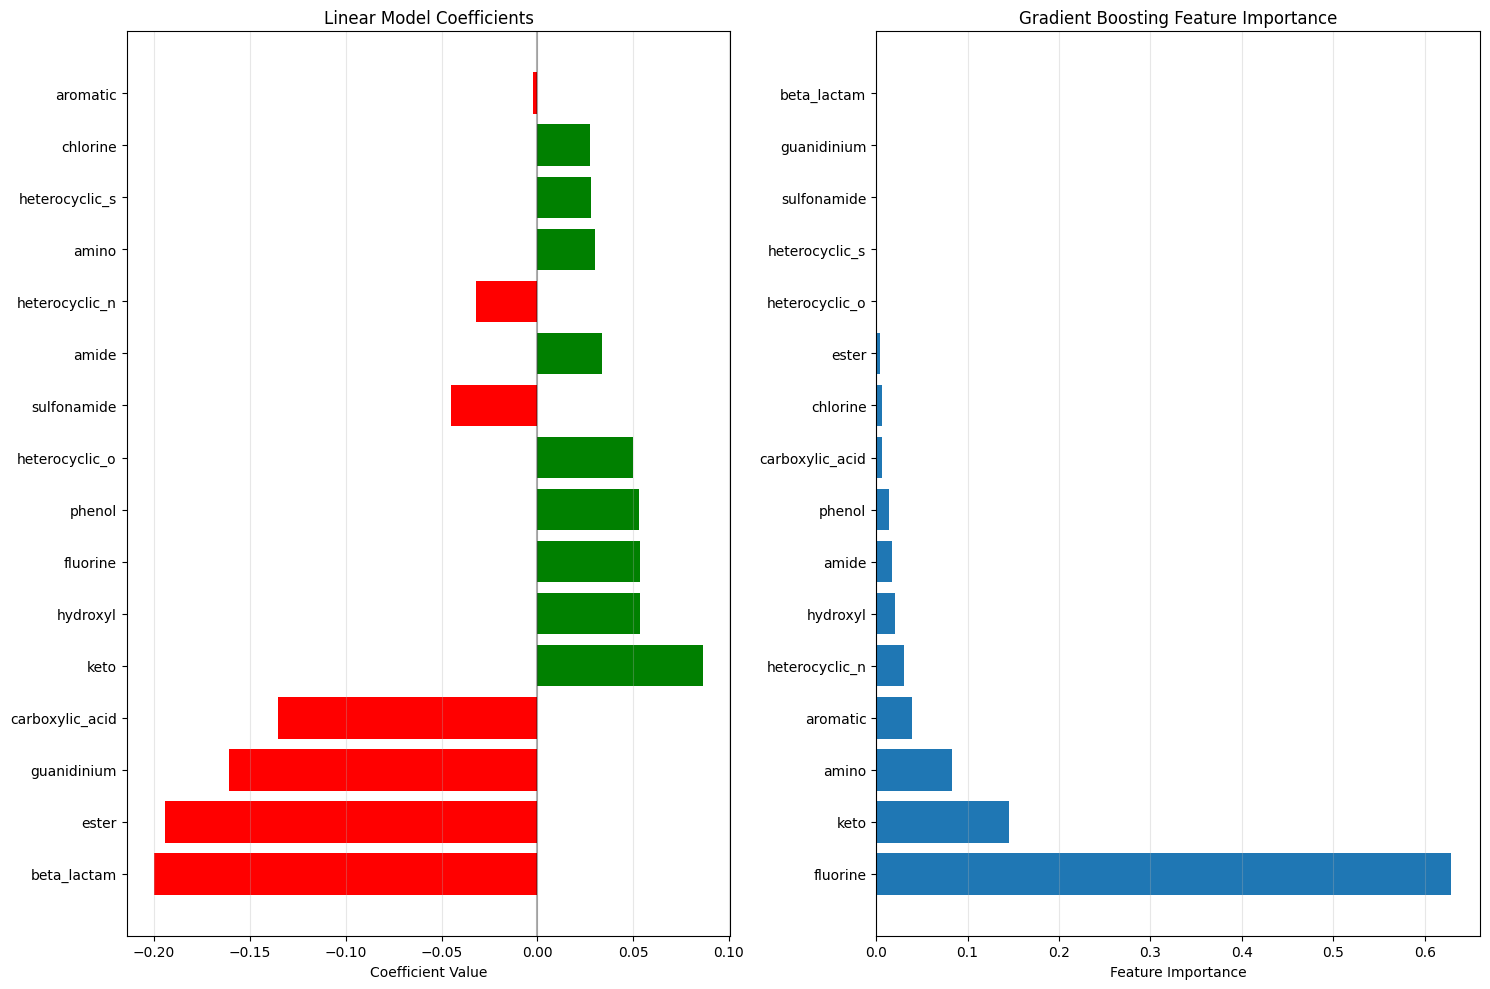

In [ ]:
# Compare feature importance between linear and non-linear models
if best_model_name in ['Random Forest', 'Gradient Boosting'] and 'importance_df' in locals():
    # Create a new figure
    plt.figure(figsize=(15, 10))

    # Set up side-by-side plots
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    # Plot linear model coefficients
    coef_colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
    ax1.barh(y=coef_df['Functional_Group'], width=coef_df['Coefficient'], color=coef_colors)
    ax1.set_xlabel('Coefficient Value')
    ax1.set_title('Linear Model Coefficients')
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax1.grid(axis='x', alpha=0.3)

    # Plot non-linear model feature importance
    ax2.barh(y=importance_df['Functional_Group'], width=importance_df['Importance'])
    ax2.set_xlabel('Feature Importance')
    ax2.set_title(f'{best_model_name} Feature Importance')
    ax2.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.savefig('linear_vs_nonlinear_importance.png')

    # Create a table comparing rankings
    linear_ranks = coef_df[['Functional_Group', 'Absolute_Coefficient']].rename(
        columns={'Absolute_Coefficient': 'Linear_Importance'})
    nonlinear_ranks = importance_df.rename(columns={'Importance': 'Nonlinear_Importance'})

    # Merge the two rankings
    comparison = pd.merge(
        linear_ranks,
        nonlinear_ranks,
        on='Functional_Group',
        how='outer'
    ).fillna(0)

    # Add rank columns
    comparison['Linear_Rank'] = comparison['Linear_Importance'].rank(ascending=False)
    comparison['Nonlinear_Rank'] = comparison['Nonlinear_Importance'].rank(ascending=False)
    comparison['Rank_Difference'] = abs(comparison['Linear_Rank'] - comparison['Nonlinear_Rank'])

    # Sort by the largest rank differences
    comparison = comparison.sort_values('Rank_Difference', ascending=False)

    print("\nFunctional groups with largest difference in importance between models:")
    print(comparison.head(5))

**Create a Scatter Plot of Predictions from Best Model**

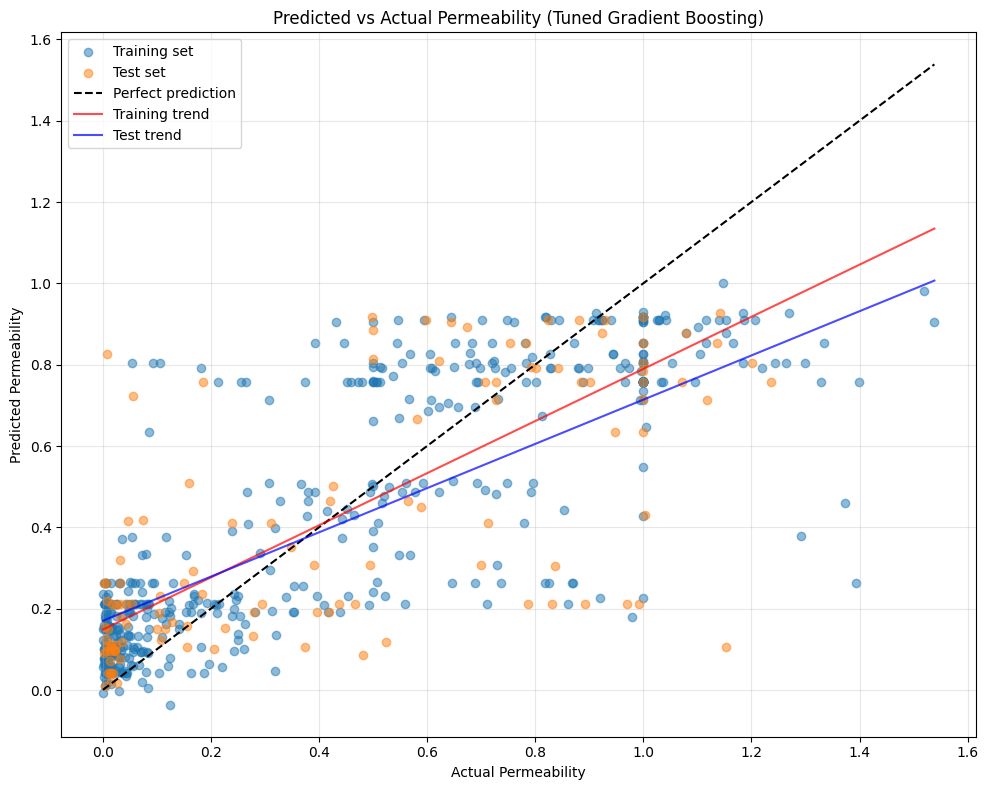

In [ ]:
# Use the best model (tuned or untuned)
if 'best_model' in locals():
    prediction_model = best_model
    model_name = f"Tuned {best_model_name}"
elif best_model_name in ['Random Forest', 'Gradient Boosting']:
    prediction_model = results[best_model_name]['model']
    model_name = best_model_name
else:
    # Use linear model
    prediction_model = model
    model_name = "Linear Regression"

# Make predictions
y_train_pred = prediction_model.predict(X_train)
y_test_pred = prediction_model.predict(X_test)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training set')
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test set')

# Add perfect prediction line
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect prediction')

# Add trend lines
from scipy.stats import linregress
slope_train, intercept_train, _, _, _ = linregress(y_train, y_train_pred)
slope_test, intercept_test, _, _, _ = linregress(y_test, y_test_pred)

x_trend = np.linspace(min_val, max_val, 100)
plt.plot(x_trend, slope_train * x_trend + intercept_train, 'r-', alpha=0.7, label='Training trend')
plt.plot(x_trend, slope_test * x_trend + intercept_test, 'b-', alpha=0.7, label='Test trend')

plt.xlabel('Actual Permeability')
plt.ylabel('Predicted Permeability')
plt.title(f'Predicted vs Actual Permeability ({model_name})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('best_model_predictions.png')

**7. Understanding the Relationship Between Top Features and Permeability**

<Figure size 1500x1000 with 0 Axes>

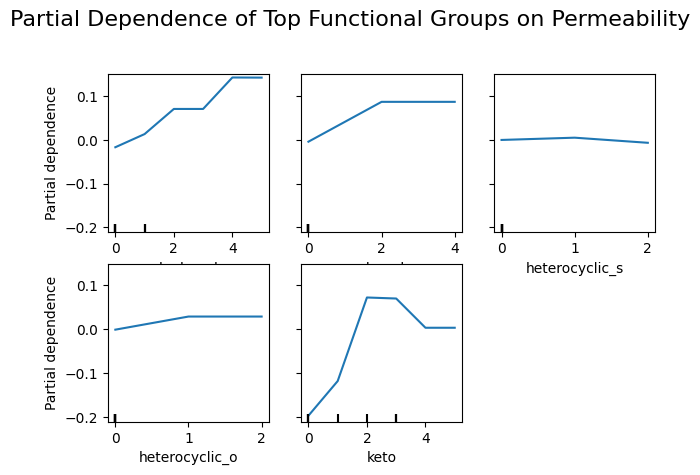

In [ ]:
from sklearn.inspection import PartialDependenceDisplay



# Identify top functional groups (combine rankings from linear and non-linear models)
if 'comparison' in locals():
    top_features = comparison.nsmallest(5, 'Rank_Difference')['Functional_Group'].tolist()
else:
    top_features = coef_df.head(5)['Functional_Group'].tolist()

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # Create partial dependence plots for top features
    plt.figure(figsize=(15, 10))
    PartialDependenceDisplay.from_estimator(
        prediction_model, X_train, features=top_features,
        n_cols=3, grid_resolution=20, n_jobs=-1
    )
    plt.suptitle(f'Partial Dependence of Top Functional Groups on Permeability', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('partial_dependence_plots.png')

**8. Interaction Effects Between Functional Groups**

In [ ]:
if best_model_name in ['Random Forest', 'Gradient Boosting'] and len(top_features) >= 2:
    # Look at interactions between top 2 features
    fig = plt.figure(figsize=(10, 8))

    top_2_features = top_features[:2]

    # Create 2D partial dependence plot
    pdp = partial_dependence(
        prediction_model, X_train, features=top_2_features,
        kind='average', grid_resolution=20
    )

    # Get the values and predictions
    XX, YY = np.meshgrid(pdp['values'][0], pdp['values'][1])
    Z = pdp['average'].T

    # Plot as a contour plot
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(XX, YY, Z, cmap='viridis', alpha=0.8, edgecolor='k', linewidth=0.5)

    ax.set_xlabel(top_2_features[0])
    ax.set_ylabel(top_2_features[1])
    ax.set_zlabel('Predicted Permeability')
    ax.set_title(f'Interaction Between {top_2_features[0]} and {top_2_features[1]}')

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.tight_layout()
    plt.savefig('feature_interaction.png')

KeyError: 'values'

<Figure size 1000x800 with 0 Axes>